In [1]:
#Importando librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt

In [2]:
#Cargando los datos
A=np.load('fit_exercise.npy')
x=A[0]
y=A[1]
sig=A[2]
sigma=0.05


In [3]:
#Funciones
# funcion del modelo
def f(x, a, b):
    return a + b*x

# Likelihood
def llh(theta):
    return -np.sum((2*np.pi*sig**2)+(y - f(x, *theta))**2/(2*sig**2))
    #return -0.5*np.sum(np.log(2*np.pi*sigma**2)+(y - f(x, *theta))**2/(sig**2))
    #return -np.sum(np.log(sigma*np.sqrt(2 * np.pi))+(y - f(x, *theta))**2/(2*sigma**2))

def prior():
    if sigma <= 0:
        return 0.0
    return 1
    
# Posterior
def p(theta):
    return llh(theta)+prior()

# Generador de muestras
def sample(a,b):
    th=(a,b)
    a_new=np.random.normal(a, sigma)
    b_new=np.random.normal(b,sigma)
    th_new=(a_new,b_new)
    p_old = p(th)
    p_new = p(th_new)
    if p_new>p_old:
            th= th_new
    else:
            p_accept= p_new / p_old
            accept = np.random.rand()
            if accept< p_accept:
                th= th_new
   
    return th

In [4]:
#valores iniciales de los parámetros 
#theta_start = (1, 1)
t=(-1.0,4.5)
post=[]
post.append(t)
for i in range(5):
    post.append(sample(*post[i]))
    


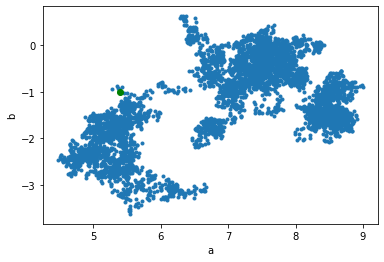

In [7]:
#Valor inicial de los valores
tp=(5.4,-1)
#Número de pasos
N=5000
#Vector donde se guardan las nuevas coordenadas de a
ap=[]
#Vector donde se guardan las nuevas coordenadas de b
bp=[]
#Guardo los valores iniciales de a y b
ap.append(tp[0])
bp.append(tp[1])
postp=[]
postp.append(tp)
for i in range(N): 
    aux=sample(*postp[i])
    ap.append(aux[0])
    bp.append(aux[1])
    postp.append(aux)
    
#Gráfica de los puntos que se van generando
plt.plot(ap,bp,'.')
plt.plot(tp[0],tp[1],'go')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

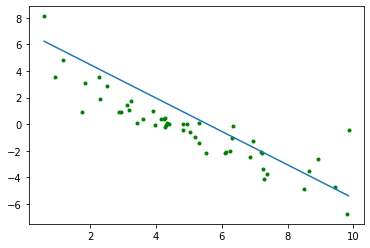

In [8]:
#Línea que se genera con los datos
yk=sum(bp)/len(bp)*x+sum(ap)/len(ap)
plt.plot(x,y,'g.')
plt.plot(x,yk)
plt.show()